In [1]:
train = pd.read_csv("./raw/application_train.csv")

In [2]:
%matplotlib inline

변수명
- train_target0 : target 값이 0인 전체 데이터
- train_target1 : target 값이 1인 전체 데이터
- conti_target0 : target 값이 0인 데이터 중 연속변수
- conti_target1 : target 값이 1인 데이터 중 연속변수
- class_target0 : target 값이 0인 데이터 중 categorical 변수
- class_target1 : target 값이 1인 데이터 중 categorical 변수

- days_birth 변수를 보면 어릴 수록 연체가 많음
- "DAYS_ID_PUBLISH" 변수에서 갑자기 줄어드는 이유?

In [14]:
train_target0 = train[train["TARGET"]==0]
train_target1 = train[train["TARGET"]==1]

In [4]:
# continuous 변수들
continuous_columns = ["CNT_CHILDREN", "AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY",
                      "AMT_GOODS_PRICE", "REGION_POPULATION_RELATIVE", "DAYS_BIRTH", "DAYS_EMPLOYED",
                      "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "OWN_CAR_AGE", "CNT_FAM_MEMBERS",
                      "EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3", "OBS_30_CNT_SOCIAL_CIRCLE" ,
                      "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE",
                      "DAYS_LAST_PHONE_CHANGE"]

building_info_continuous = ["APARTMENTS_AVG", "BASEMENTAREA_AVG", "YEARS_BEGINEXPLUATATION_AVG", "YEARS_BUILD_AVG",
                 "COMMONAREA_AVG", "ELEVATORS_AVG", "ENTRANCES_AVG", "FLOORSMAX_AVG", "FLOORSMIN_AVG",
                 "LANDAREA_AVG", "LIVINGAPARTMENTS_AVG", "LIVINGAREA_AVG", "NONLIVINGAPARTMENTS_AVG",
                 "NONLIVINGAREA_AVG", "APARTMENTS_MODE", "BASEMENTAREA_MODE", "YEARS_BEGINEXPLUATATION_MODE",
                 "YEARS_BUILD_MODE", "COMMONAREA_MODE", "ELEVATORS_MODE", "ENTRANCES_MODE", "FLOORSMAX_MODE",
                 "FLOORSMIN_MODE", "LANDAREA_MODE", "LIVINGAPARTMENTS_MODE", "LIVINGAREA_MODE",
                 "NONLIVINGAPARTMENTS_MODE", "NONLIVINGAREA_MODE", "APARTMENTS_MEDI", "BASEMENTAREA_MEDI",
                 "YEARS_BEGINEXPLUATATION_MEDI", "YEARS_BUILD_MEDI", "COMMONAREA_MEDI", "ELEVATORS_MEDI",
                 "ENTRANCES_MEDI", "FLOORSMAX_MEDI", "FLOORSMIN_MEDI", "LANDAREA_MEDI", "LIVINGAPARTMENTS_MEDI",
                 "LIVINGAREA_MEDI", "NONLIVINGAPARTMENTS_MEDI", "NONLIVINGAREA_MEDI", "TOTALAREA_MODE"]

In [5]:
# categorical 변수들
class_columns = ["NAME_CONTRACT_TYPE", "CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY",
                 "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE",
                 "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "FLAG_MOBIL",
                 "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE", "FLAG_PHONE",
                 "FLAG_EMAIL", "OCCUPATION_TYPE", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY",
                 "WEEKDAY_APPR_PROCESS_START", "HOUR_APPR_PROCESS_START", "REG_REGION_NOT_LIVE_REGION",
                 "REG_REGION_NOT_WORK_REGION", "LIVE_REGION_NOT_WORK_REGION", "REG_CITY_NOT_LIVE_CITY",
                 "REG_CITY_NOT_WORK_CITY", "LIVE_CITY_NOT_WORK_CITY", "ORGANIZATION_TYPE",
                 "AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_WEEK",
                 "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_QRT", "AMT_REQ_CREDIT_BUREAU_YEAR"]

flag_document_class = ["FLAG_DOCUMENT_" + str(i) for i in range(2, 22)]

building_info_class = ["FONDKAPREMONT_MODE", "HOUSETYPE_MODE", "WALLSMATERIAL_MODE", "EMERGENCYSTATE_MODE"]

---

In [3]:
# 모든 변수명 보기
train.tail().T

,307506,307507,307508,307509,307510
SK_ID_CURR,456251,456252,456253,456254,456255
TARGET,0,0,0,1,0
NAME_CONTRACT_TYPE,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans
CODE_GENDER,M,F,F,F,F
FLAG_OWN_CAR,N,N,N,N,N
FLAG_OWN_REALTY,N,Y,Y,Y,N
CNT_CHILDREN,0,0,0,0,0
AMT_INCOME_TOTAL,157500,72000,153000,171000,157500
AMT_CREDIT,254700,269550,677664,370107,675000
AMT_ANNUITY,27558,12001.5,29979,20205,49117.5


In [54]:
# target 변수에 따라 continuous 변수 비교

# Target 1의 categorical 변수만
conti_target1 = pd.DataFrame()
for i in continuous_columns+building_info_continuous+["TARGET", "SK_ID_CURR"]:
    conti_target1[i] = train_target1[i]

vs1 = conti_target1.describe().T

# Target 0의 categorical 변수만
conti_target0 = pd.DataFrame()
for i in continuous_columns+building_info_continuous+["TARGET", "SK_ID_CURR"]:
    conti_target0[i] = train_target0[i]

vs0 = conti_target0.describe().T

In [55]:
pd.concat([vs0, vs1], axis=1)

,count,mean,std,min,25%,50%,75%,max,count,mean,std,min,25%,50%,75%,max
CNT_CHILDREN,282686.0,0.412946,0.718843,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01,24825.0,0.463807,0.756903,0.000000,0.000000,0.000000,1.000000,1.100000e+01
AMT_INCOME_TOTAL,282686.0,169077.722266,110476.268524,2.565000e+04,112500.000000,148500.000000,202500.000000,1.800009e+07,24825.0,165611.760906,746676.959440,25650.000000,112500.000000,135000.000000,202500.000000,1.170000e+08
AMT_CREDIT,282686.0,602648.282002,406845.907710,4.500000e+04,270000.000000,517788.000000,810000.000000,4.050000e+06,24825.0,557778.527674,346433.235646,45000.000000,284400.000000,497520.000000,733315.500000,4.027680e+06
AMT_ANNUITY,282674.0,27163.623349,14658.307178,1.615500e+03,16456.500000,24876.000000,34749.000000,2.580255e+05,24825.0,26481.744290,12450.676999,2722.500000,17361.000000,25263.000000,32976.000000,1.492110e+05
AMT_GOODS_PRICE,282429.0,542736.795003,373785.493533,4.050000e+04,238500.000000,450000.000000,688500.000000,4.050000e+06,24804.0,488972.412554,311636.495297,45000.000000,238500.000000,450000.000000,675000.000000,3.600000e+06
REGION_POPULATION_RELATIVE,282686.0,0.021021,0.013978,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02,24825.0,0.019131,0.011905,0.000533,0.009630,0.018634,0.025164,7.250800e-02
DAYS_BIRTH,282686.0,-16138.176397,4364.200856,-2.522900e+04,-19793.750000,-15877.000000,-12536.000000,-7.489000e+03,24825.0,-14884.828077,4192.844583,-25168.000000,-18037.000000,-14282.000000,-11396.000000,-7.678000e+03
DAYS_EMPLOYED,282686.0,65696.146123,142877.810161,-1.791200e+04,-2813.000000,-1235.000000,-278.000000,3.652430e+05,24825.0,42394.675448,119484.634253,-16069.000000,-2156.000000,-1034.000000,-379.000000,3.652430e+05
DAYS_REGISTRATION,282686.0,-5029.941065,3538.464478,-2.467200e+04,-7550.000000,-4544.000000,-2045.000000,0.000000e+00,24825.0,-4487.127009,3299.650241,-22928.000000,-6646.000000,-4056.000000,-1671.000000,0.000000e+00
DAYS_ID_PUBLISH,282686.0,-3017.219788,1506.614090,-7.197000e+03,-4313.000000,-3295.000000,-1755.000000,0.000000e+00,24825.0,-2732.099617,1516.975313,-6207.000000,-4119.000000,-2797.000000,-1392.000000,0.000000e+00


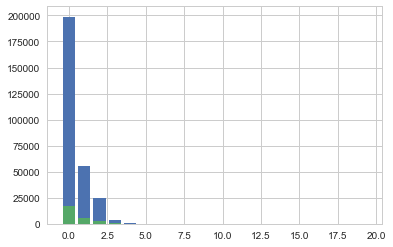

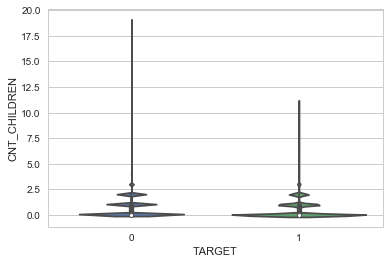

In [50]:
x0, y0 = np.unique(train_target0["CNT_CHILDREN"], return_counts=True)
x1, y1 = np.unique(train_target1["CNT_CHILDREN"], return_counts=True)
plt.bar(x0, y0, label="target0")
plt.bar(x1, y1, label="target1")
plt.show()

sns.violinplot(x=train.TARGET, y=train.CNT_CHILDREN)
plt.show()

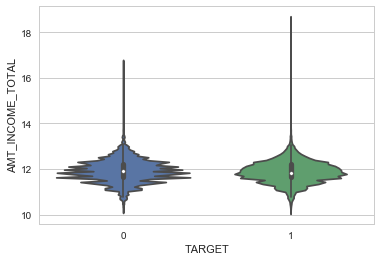

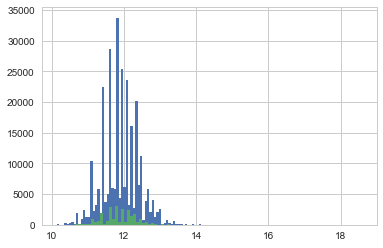

In [51]:
sns.violinplot(x=train["TARGET"], y=np.log(train.AMT_INCOME_TOTAL))
plt.show()

# 앞쪽에 많이 몰려 있어서 log
plt.hist(np.log1p(train_target0.AMT_INCOME_TOTAL), bins=100)
plt.hist(np.log1p(train_target1.AMT_INCOME_TOTAL), bins=100)
plt.show()

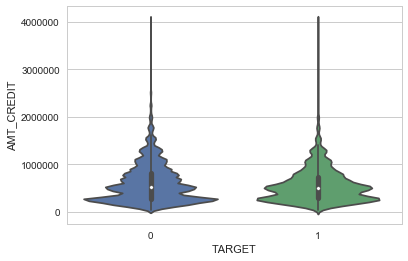

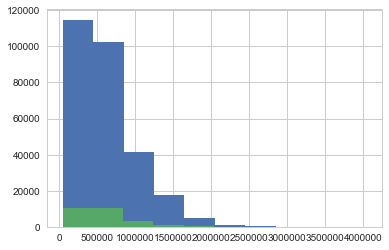

In [52]:
sns.violinplot(x=train["TARGET"], y=train.AMT_CREDIT)
plt.show()

plt.hist(train_target0.AMT_CREDIT)
plt.hist(train_target1.AMT_CREDIT)
plt.show()

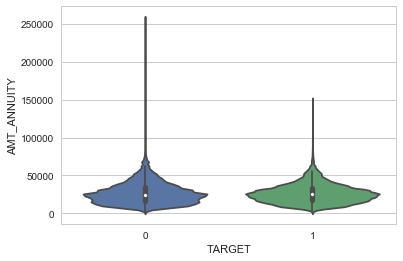

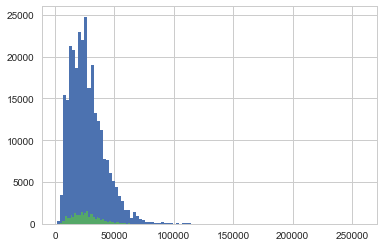

In [53]:
sns.violinplot(x=train.TARGET, y=train.AMT_ANNUITY)
plt.show()

plt.hist(train_target0.AMT_ANNUITY.dropna(), bins=100)
plt.hist(train_target1.AMT_ANNUITY.dropna(), bins=100)
plt.show()

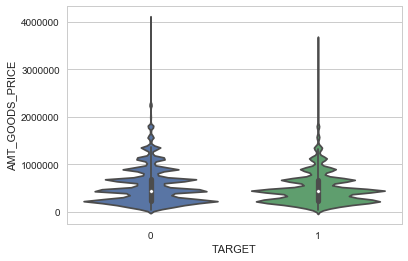

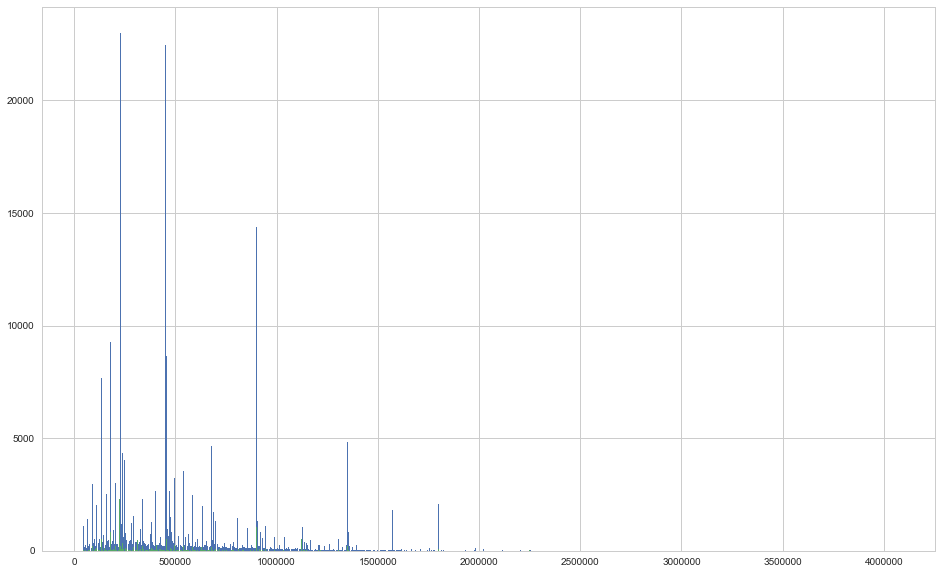

In [54]:
sns.violinplot(x=train.TARGET, y=train.AMT_GOODS_PRICE)
plt.show()

plt.figure(figsize=(16, 10))
plt.hist(train_target0.AMT_GOODS_PRICE.dropna(), bins=1000)
plt.hist(train_target1.AMT_GOODS_PRICE.dropna(), bins=1000)
plt.show()

In [18]:
def make_graph(variable, N=100):
    sns.violinplot(x=train.TARGET, y=train[variable])
    plt.show()

    plt.hist(train_target0[variable].dropna(), bins=N)
    plt.hist(train_target1[variable].dropna(), bins=N)
    plt.show()

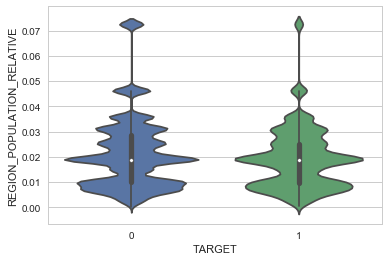

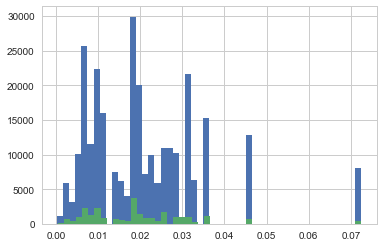

In [27]:
make_graph("REGION_POPULATION_RELATIVE", 50)

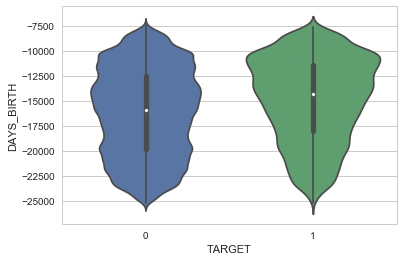

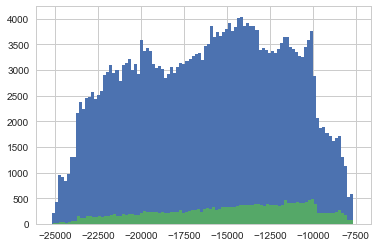

In [20]:
make_graph("DAYS_BIRTH")

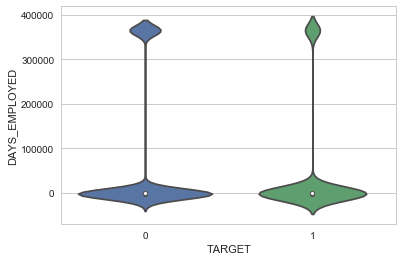

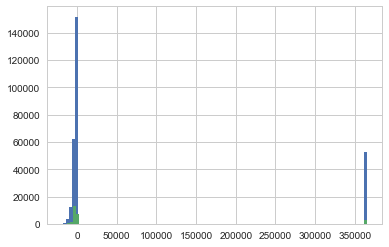

In [25]:
make_graph("DAYS_EMPLOYED", 100)

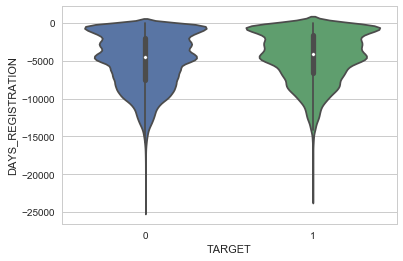

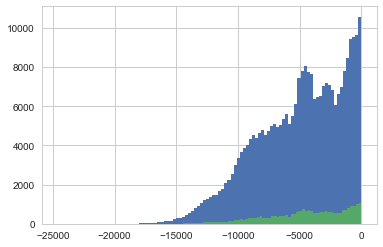

In [26]:
make_graph("DAYS_REGISTRATION")

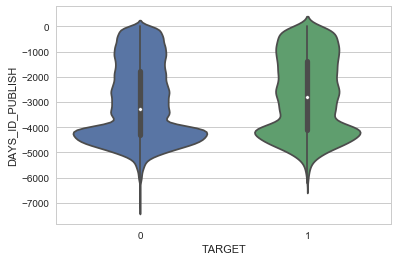

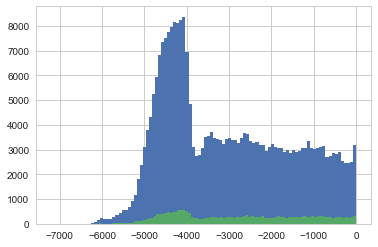

In [31]:
make_graph("DAYS_ID_PUBLISH", 100)

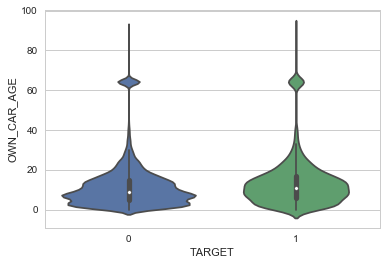

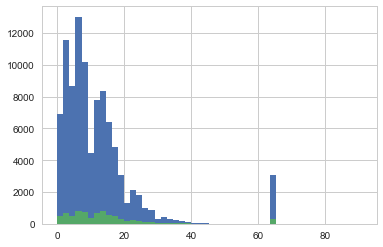

In [34]:
make_graph("OWN_CAR_AGE", 50)

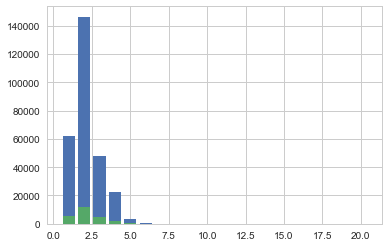

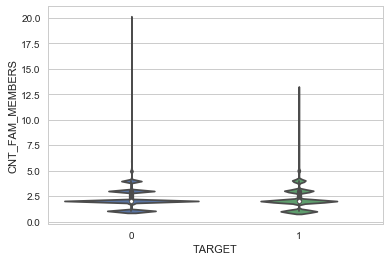

In [36]:
x0, y0 = np.unique(train_target0["CNT_FAM_MEMBERS"], return_counts=True)
x1, y1 = np.unique(train_target1["CNT_FAM_MEMBERS"], return_counts=True)
plt.bar(x0, y0, label="target0")
plt.bar(x1, y1, label="target1")
plt.show()

sns.violinplot(x=train.TARGET, y=train.CNT_FAM_MEMBERS)
plt.show()

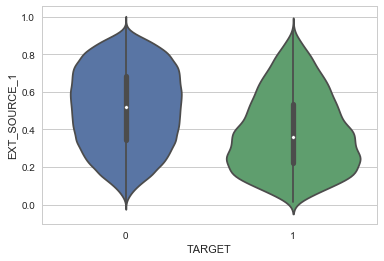

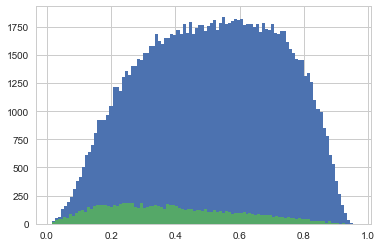

In [37]:
make_graph("EXT_SOURCE_1")

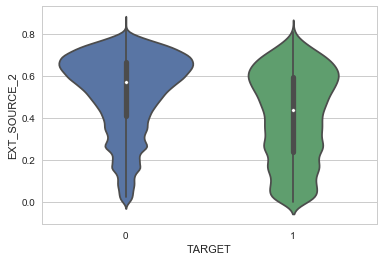

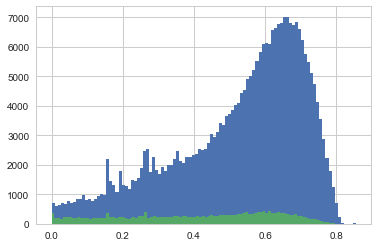

In [38]:
make_graph("EXT_SOURCE_2")

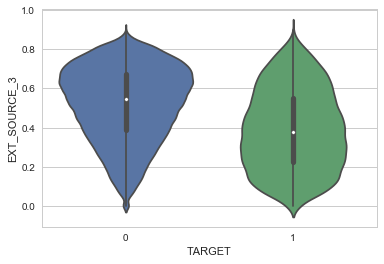

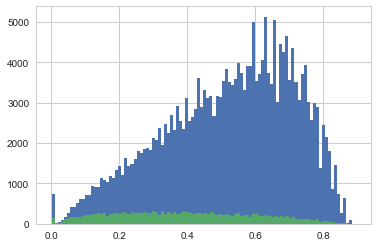

In [39]:
make_graph("EXT_SOURCE_3")

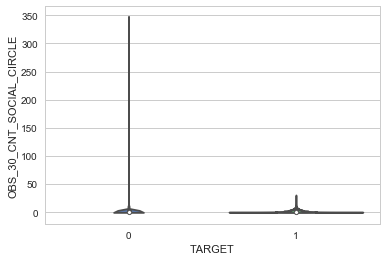

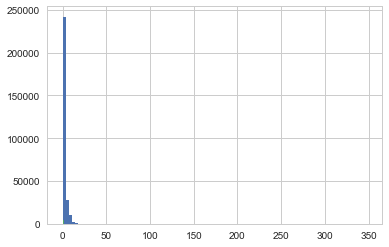

In [40]:
make_graph("OBS_30_CNT_SOCIAL_CIRCLE")

In [44]:
np.unique(train["OBS_30_CNT_SOCIAL_CIRCLE"].dropna(), return_counts=True)

(array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  47., 348.]),
 array([163910,  48783,  29808,  20322,  14143,   9553,   6453,   4390,
          2967,   2003,   1376,    852,    652,    411,    258,    166,
           133,     88,     46,     44,     30,     29,     22,     15,
            11,     11,      3,      5,      1,      1,      2,      1,
             1], dtype=int64))

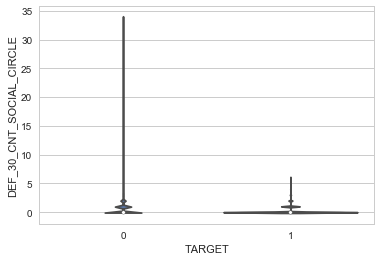

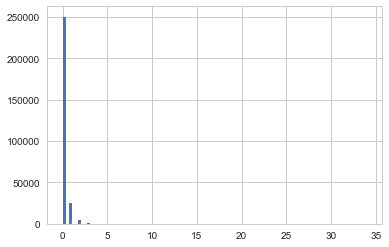

In [45]:
make_graph("DEF_30_CNT_SOCIAL_CIRCLE")

In [46]:
np.unique(train["DEF_30_CNT_SOCIAL_CIRCLE"].dropna(), return_counts=True)

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8., 34.]),
 array([271324,  28328,   5323,   1192,    253,     56,     11,      1,
             1,      1], dtype=int64))

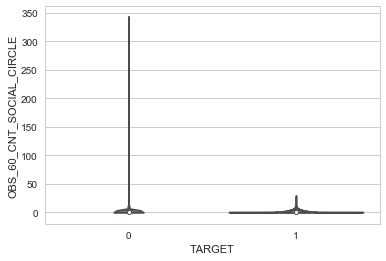

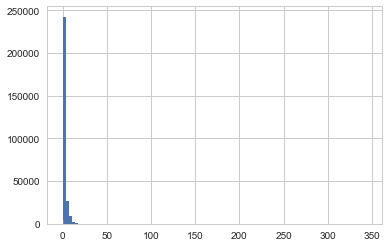

In [47]:
make_graph("OBS_60_CNT_SOCIAL_CIRCLE")

In [48]:
np.unique(train["OBS_60_CNT_SOCIAL_CIRCLE"].dropna(), return_counts=True)

(array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  47., 344.]),
 array([164666,  48870,  29766,  20215,  13946,   9463,   6349,   4344,
          2886,   1959,   1335,    837,    620,    401,    238,    166,
           137,     73,     49,     44,     30,     28,     20,     13,
            12,     11,      1,      5,      1,      2,      1,      1,
             1], dtype=int64))

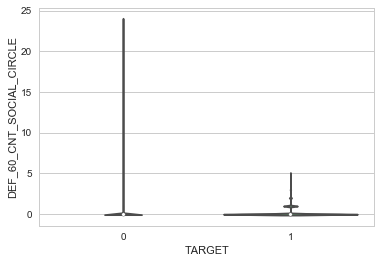

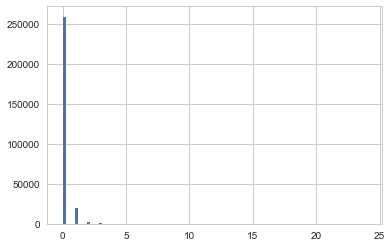

In [49]:
make_graph("DEF_60_CNT_SOCIAL_CIRCLE")

In [50]:
np.unique(train["DEF_60_CNT_SOCIAL_CIRCLE"].dropna(), return_counts=True)

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7., 24.]),
 array([280721,  21841,   3170,    598,    135,     20,      3,      1,
             1], dtype=int64))

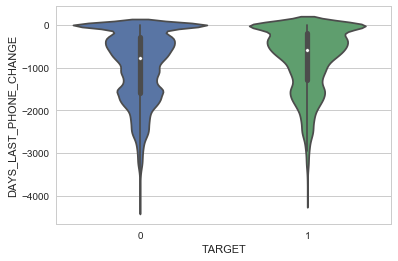

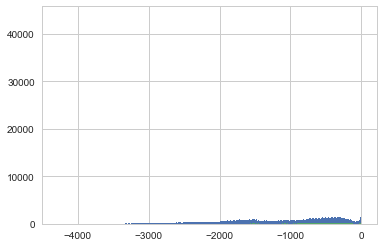

In [54]:
make_graph("DAYS_LAST_PHONE_CHANGE", 500)

In [55]:
np.unique(train["DAYS_LAST_PHONE_CHANGE"].dropna(), return_counts=True)

(array([-4.292e+03, -4.185e+03, -4.173e+03, ..., -2.000e+00, -1.000e+00,
         0.000e+00]),
 array([    1,     1,     1, ...,  2318,  2812, 37672], dtype=int64))